In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from bootcampviztools import *

In [120]:
df = pd.read_csv('./tracks.csv').iloc[:, 1:]
df

,track_name,artist_name,album_name,duration_s,release_date,popularity,explicit,track_id,artist_id,genres,Productora,colab,duration,tempo,key,avg_rms,avg_flatness,num_onsets,onset_density
0,GRAN VÍA,"Quevedo, Aitana",BUENAS NOCHES,213.528,2024-11-22,74,False,2kQ1OvmMzs1xdlH020aJJh,52iwsT98xCoGgiGntTiR7K,reggaeton,DQE PRODUCTIONS,True,213.530748,161.50,5,0.298198,0.025699,819,3.835513
1,SHIBATTO,Quevedo,BUENAS NOCHES,138.226,2024-11-22,67,False,41VnmHAkCUsCStYdDUibpp,52iwsT98xCoGgiGntTiR7K,reggaeton,DQE PRODUCTIONS,False,139.830612,99.38,8,0.276049,0.040778,517,3.697331
2,Si Antes Te Hubiera Conocido,KAROL G,Si Antes Te Hubiera Conocido,195.824,2024-06-21,87,False,6WatFBLVB0x077xWeoVc2k,790FomKkXshlbRYZFtlgla,"reggaeton, latin, urbano latino",UNIVERSAL,False,274.796599,129.20,3,0.245466,0.017670,1093,3.977487
3,KASSANDRA,Quevedo,BUENAS NOCHES,183.172,2024-11-22,68,False,6mP16Mr2X3ZU2bNmWBUqzK,52iwsT98xCoGgiGntTiR7K,reggaeton,DQE PRODUCTIONS,False,209.130567,117.45,5,0.255236,0.035691,498,2.381287
4,DEGENERE 👑 (feat. benny blanco),"Myke Towers, benny blanco",DEGENERE 👑 (feat. benny blanco),130.880,2024-10-16,72,True,4xISUrw0t2elabEhKrtAJ0,7iK8PXO48WeuP03g8YR51W,"reggaeton, trap latino, urbano latino",ONE WORLD MUSIC,True,132.748526,198.77,9,0.269947,0.040845,530,3.992511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pégate,Standly,Pégate,186.096,2022-01-03,71,False,3E8xyYdIPpiH2wNEozE68I,0rjms710nwQTdrQheXHJfz,"reggaeton chileno, chilean trap, chilean mambo...",SONY MUSIC,False,183.507347,99.38,9,0.241643,0.026204,775,4.223264
96,Revolú,"Rauw Alejandro, Feid",Revolú,215.511,2024-11-14,56,True,0Fpw7AgVXI9Nql2vLbJAhP,1mcTU81TzQhprhouKaTkpq,"reggaeton, urbano latino, trap latino, latin",SONY MUSIC,True,215.516054,99.38,8,0.297087,0.021825,776,3.600660
97,Orgullosa De Papá,"Cano, Rvfv",Orgullosa De Papá,174.174,2024-09-26,49,False,3lLIUWnUhRTsd5FmG2jRJT,60ZOYUFnCYEeKYsxgvPxOS,"flamenco urbano, flamenco",RABAT MUSIC SL,True,190.125034,136.00,0,0.245810,0.104432,717,3.771202
98,Columbia,Quevedo,Columbia,186.000,2023-07-07,76,False,6XbtvPmIpyCbjuT0e8cQtp,52iwsT98xCoGgiGntTiR7K,reggaeton,TASTE THE FLOOR RECORDS,False,205.310884,99.38,5,0.272934,0.023340,606,2.951621


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   track_name     100 non-null    object 
 1   artist_name    100 non-null    object 
 2   album_name     100 non-null    object 
 3   duration_s     100 non-null    float64
 4   release_date   100 non-null    object 
 5   popularity     100 non-null    int64  
 6   explicit       100 non-null    bool   
 7   track_id       100 non-null    object 
 8   artist_id      100 non-null    object 
 9   genres         75 non-null     object 
 10  Productora     100 non-null    object 
 11  colab          100 non-null    bool   
 12  duration       100 non-null    float64
 13  tempo          100 non-null    float64
 14  key            100 non-null    int64  
 15  avg_rms        100 non-null    float64
 16  avg_flatness   100 non-null    float64
 17  num_onsets     100 non-null    int64  
 18  onset_densi

In [122]:
columnas = list(range(7)) + list(range(9, 19))
df_eda = df.iloc[:, columnas].copy()

In [123]:
df_eda.rename(columns={'duration': 'duration_yt',
                       'Productora': 'productora'}, inplace=True)

In [124]:
df_eda['release_date'] = pd.to_datetime(df_eda['release_date'])

In [125]:
condicion = df_eda.track_name == df_eda.album_name
df_eda['format'] = 'None'
for i in range(100):
    if condicion[i] == True:
        df_eda['format'][i] = 'single'
    else:
        df_eda['format'][i] = 'album'

C:\Users\Eva\AppData\Local\Temp\ipykernel_19492\2680377487.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_eda['format'][i] = 'album'
C:\Users\Eva\AppData\Local\Temp\ipykernel_19492\2680377487.py:7: SettingWithCopyWarning: 
A value is

In [126]:
df_eda['dif_duration'] = round(df_eda.duration_s - df_eda.duration_yt)

In [127]:
df_eda.head()

,track_name,artist_name,album_name,duration_s,release_date,popularity,explicit,genres,productora,colab,duration_yt,tempo,key,avg_rms,avg_flatness,num_onsets,onset_density,format,dif_duration
0,GRAN VÍA,"Quevedo, Aitana",BUENAS NOCHES,213.528,2024-11-22,74,False,reggaeton,DQE PRODUCTIONS,True,213.530748,161.50,5,0.298198,0.025699,819,3.835513,album,-0.0
1,SHIBATTO,Quevedo,BUENAS NOCHES,138.226,2024-11-22,67,False,reggaeton,DQE PRODUCTIONS,False,139.830612,99.38,8,0.276049,0.040778,517,3.697331,album,-2.0
2,Si Antes Te Hubiera Conocido,KAROL G,Si Antes Te Hubiera Conocido,195.824,2024-06-21,87,False,"reggaeton, latin, urbano latino",UNIVERSAL,False,274.796599,129.20,3,0.245466,0.017670,1093,3.977487,single,-79.0
3,KASSANDRA,Quevedo,BUENAS NOCHES,183.172,2024-11-22,68,False,reggaeton,DQE PRODUCTIONS,False,209.130567,117.45,5,0.255236,0.035691,498,2.381287,album,-26.0
4,DEGENERE 👑 (feat. benny blanco),"Myke Towers, benny blanco",DEGENERE 👑 (feat. benny blanco),130.880,2024-10-16,72,True,"reggaeton, trap latino, urbano latino",ONE WORLD MUSIC,True,132.748526,198.77,9,0.269947,0.040845,530,3.992511,single,-2.0


In [128]:
df_eda[df_eda.genres.isna()]

,track_name,artist_name,album_name,duration_s,release_date,popularity,explicit,genres,productora,colab,duration_yt,tempo,key,avg_rms,avg_flatness,num_onsets,onset_density,format,dif_duration
6,IA,"Clarent, Mora",IA,240.000,2024-10-17,74,True,NaN,BALLER INC.,True,240.477506,112.35,0,0.261922,0.014628,683,2.840182,single,-0.0
12,Q U E V A S H A C E R H O Y ?,"Omar Courtz, De La Rose",PRIMERA MUSA,224.022,2024-09-20,81,True,NaN,DQE PRODUCTIONS,True,238.759229,117.45,1,0.326254,0.083688,804,3.367409,album,-15.0
13,Duro De Verdad pt.2,"Los Sufridos, Bad Gyal",Duro De Verdad pt.2,204.303,2024-09-12,68,False,NaN,MR. 305 RECORDS,True,216.827982,161.50,11,0.180913,0.020916,902,4.159980,single,-13.0
15,Yo sé,"Yan Block, TORRRES",Yo sé,129.705,2024-05-23,76,True,NaN,SONY MUSIC,True,127.140907,136.00,0,0.204232,0.013893,300,2.359587,single,3.0
18,PERREITO PA LLORAR,"Lola Indigo, Paulo Londra",PERREITO PA LLORAR,213.095,2024-11-28,63,False,NaN,UNIVERSAL,True,210.210295,129.20,4,0.275221,0.021368,693,3.296699,single,3.0
33,Me has invitado a bailar,Dani Fernández,Me has invitado a bailar,192.906,2024-08-23,63,False,NaN,SONY MUSIC,False,227.044762,83.35,10,0.121527,0.026024,374,1.647252,single,-34.0
37,LA REINA,Lola Indigo,LA REINA,150.000,2024-06-13,65,False,NaN,NASTU MUSIC,False,152.485488,129.20,1,0.259165,0.050388,669,4.387303,single,-2.0
46,El Último Día de Nuestras Vidas,Dani Martín,El Último Día de Nuestras Vidas,226.626,2024-11-29,54,False,NaN,SONY MUSIC,False,234.927937,152.00,2,0.192572,0.023179,393,1.672853,single,-8.0
48,Me Vuelves Puto Loco,Dani Martín,El Último Día de Nuestras Vidas,179.158,2024-11-29,54,False,NaN,SONY MUSIC,False,231.363673,92.29,8,0.226105,0.173752,336,1.452259,album,-52.0
55,FRIKI,Gonzy,FRIKI,189.066,2024-04-18,60,True,NaN,"VISONARE RECORDINGS, LLC",False,191.889751,80.75,7,0.284761,0.029033,679,3.538490,single,-3.0


### 1 Variable

In [129]:
# primero, vamos a explorar cuál va a ser la target y cómo es esta - popularidad o ranking?
df_eda['hybrid_popularity'] = (0.8 * df_eda["popularity"]) + (0.2 * (100 - df_eda.index))


In [130]:
# finalmente decidimos hacer una target categórica
df_eda['lrs'] = 'None'
for i in range(100):
    if df_eda['hybrid_popularity'][i] >= 67:
        df_eda['lrs'][i] = 'yes'
    else:
        df_eda['lrs'][i] = 'no'

C:\Users\Eva\AppData\Local\Temp\ipykernel_19492\4066194493.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_eda['lrs'][i] = 'yes'
C:\Users\Eva\AppData\Local\Temp\ipykernel_19492\4066194493.py:5: SettingWithCopyWarning: 
A value is tryi

#### Categórica

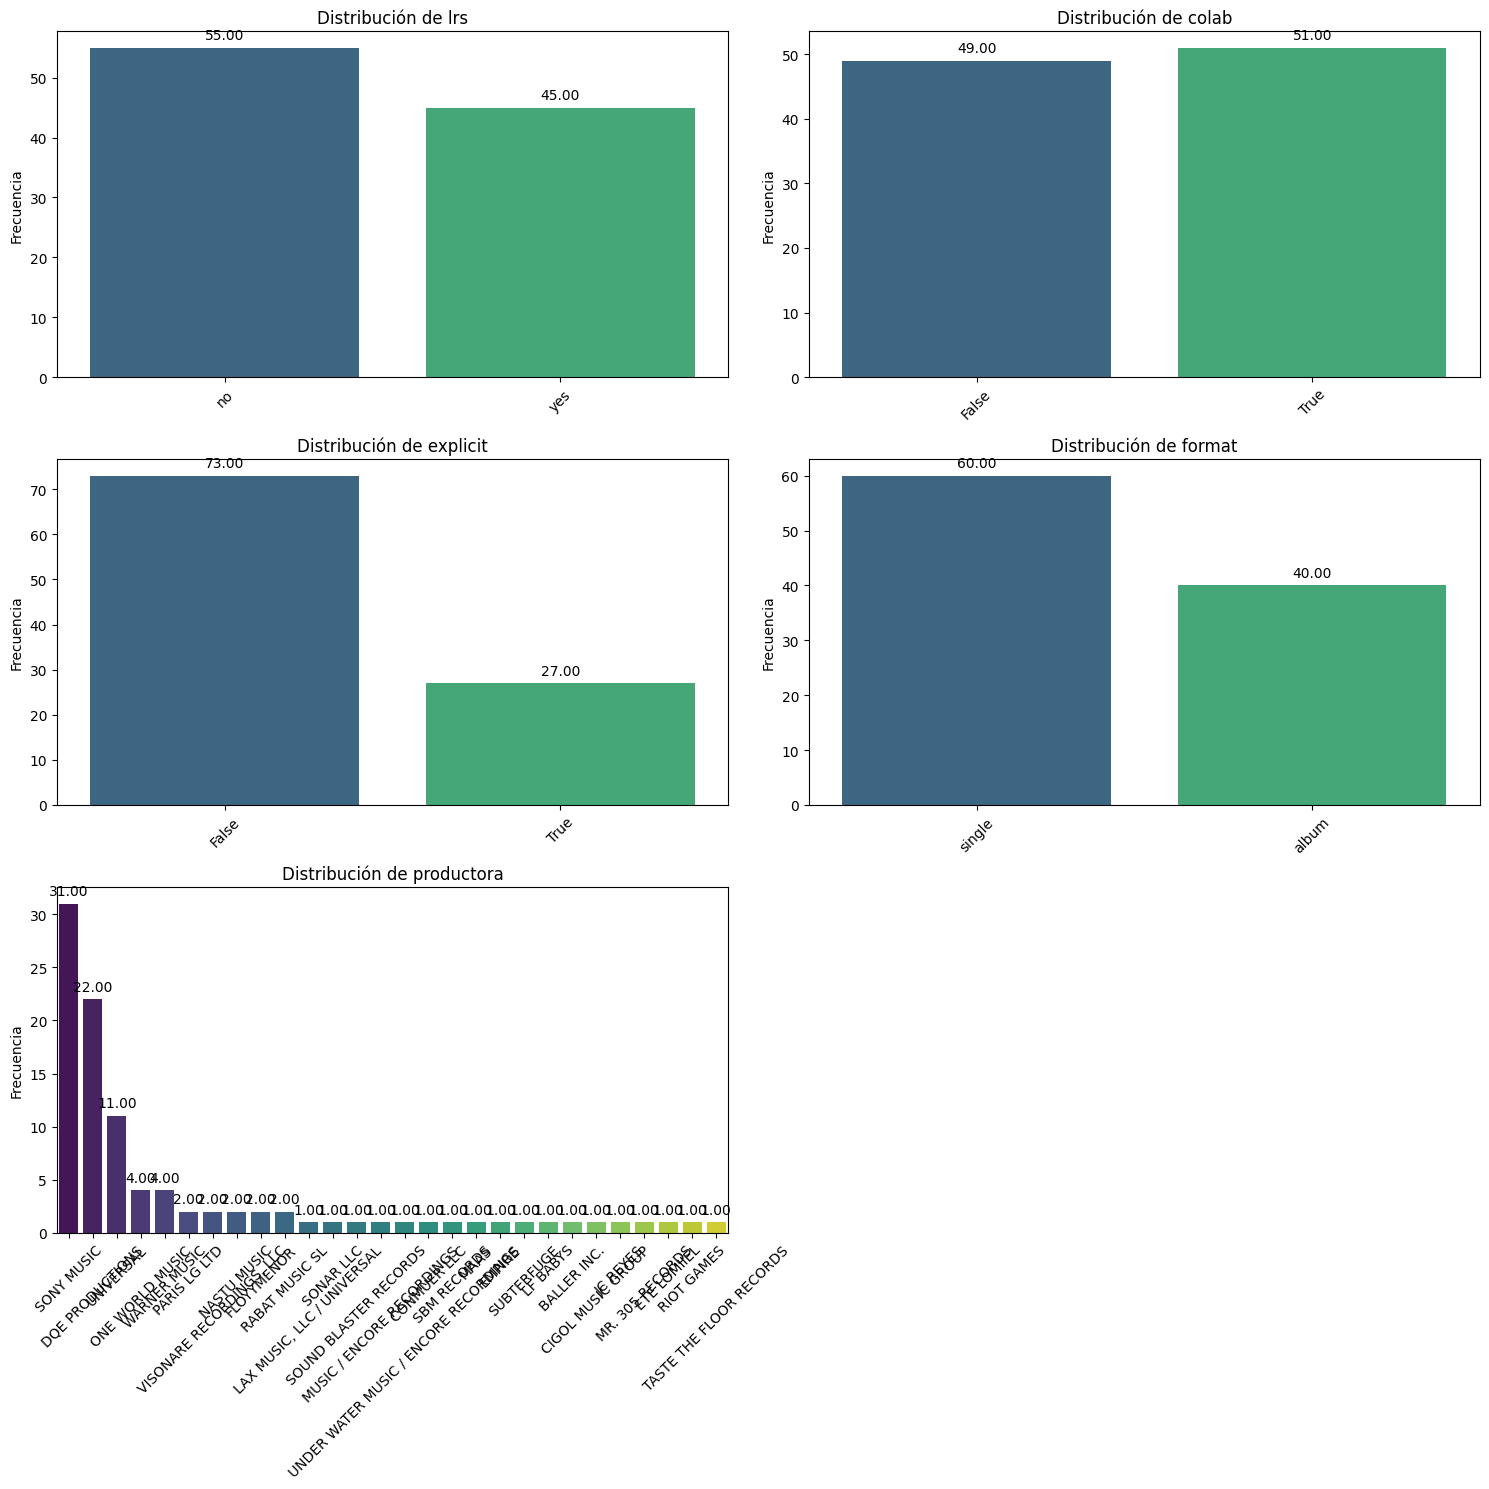

In [131]:
# 1 Variable - categóricas
pinta_distribucion_categoricas(df_eda, ['lrs', 'colab', 'explicit', 'format', 'productora'], mostrar_valores=True)

In [132]:
df_eda.productora.value_counts()

productora
SONY MUSIC                               31
DQE PRODUCTIONS                          22
UNIVERSAL                                11
ONE WORLD MUSIC                           4
WARNER MUSIC                              4
PARIS LG LTD                              2
VISONARE RECORDINGS, LLC                  2
NASTU MUSIC                               2
FLOYYMENOR                                2
RABAT MUSIC SL                            2
LAX MUSIC, LLC / UNIVERSAL                1
SONAR LLC                                 1
SOUND BLASTER RECORDS                     1
MUSIC / ENCORE RECORDINGS                 1
UNDER WATER MUSIC / ENCORE RECORDINGS     1
CONMUER LLC                               1
SBM RECORDS                               1
MAAS                                      1
EMPIRE                                    1
SUBTERFUGE                                1
LF BABYS                                  1
BALLER INC.                               1
CIGOL MUSIC GROUP    

#### Numérica

(11, 2)


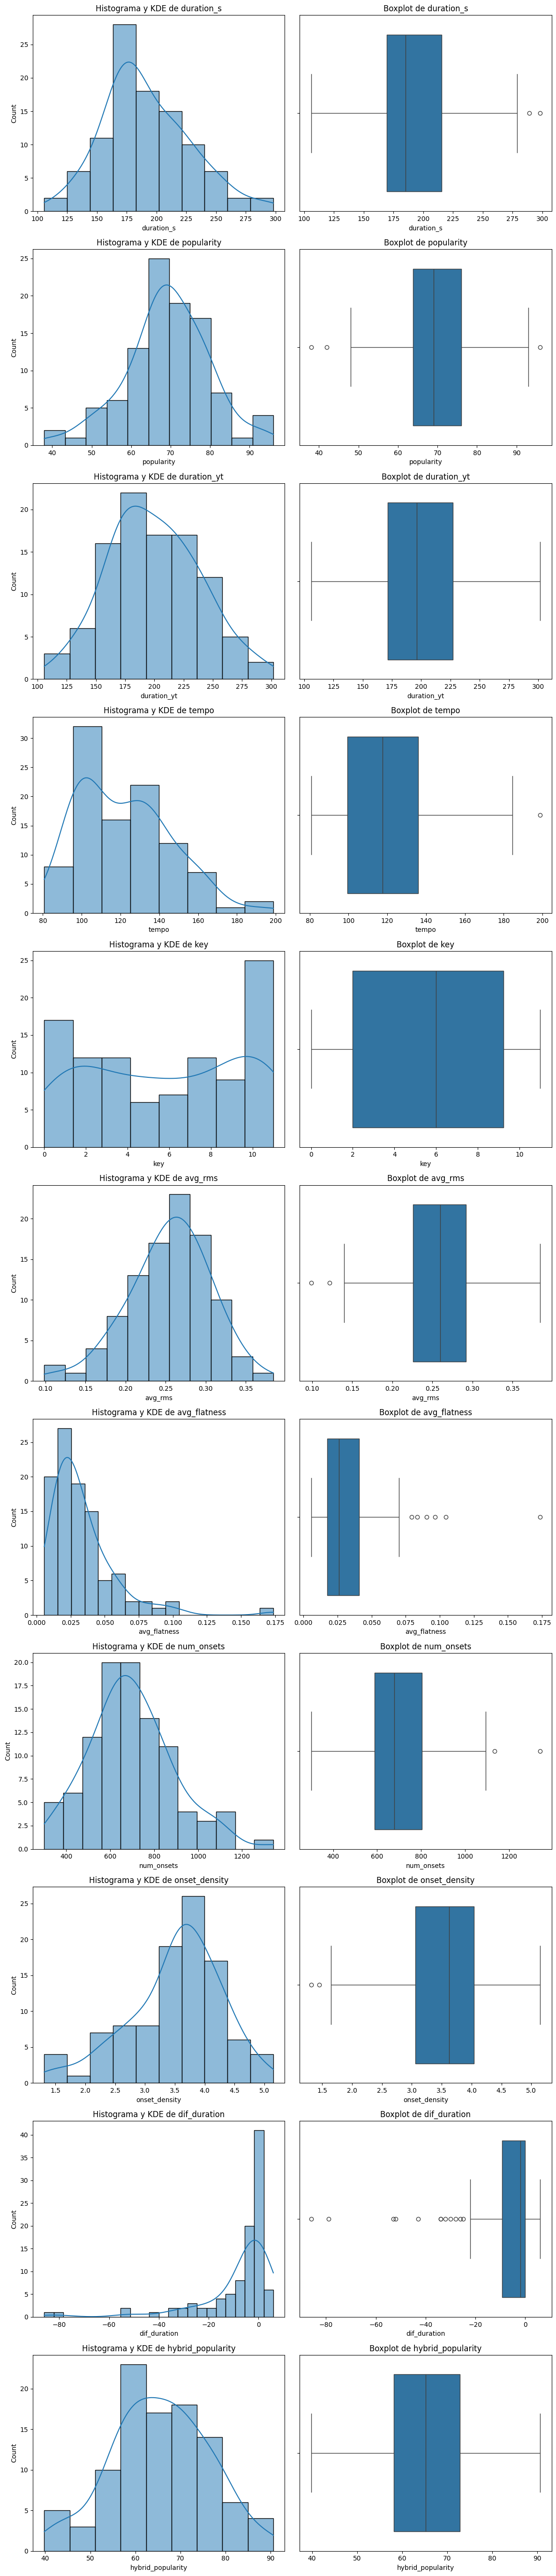

In [134]:
plot_combined_graphs(df_eda, ['duration_s',
       'popularity', 'duration_yt', 'tempo', 'key', 'avg_rms', 'avg_flatness',
       'num_onsets', 'onset_density', 'dif_duration', 'hybrid_popularity'])

### 2 Variables

#### Categórica vs. Numérica

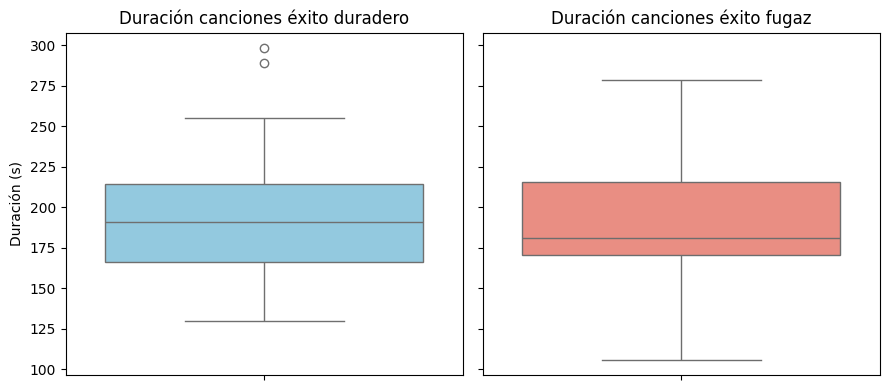

In [137]:
# target vs. duracion en spotify
fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# Boxplot para canciones más populares
sns.boxplot(y=df_eda[df_eda['lrs'] == 'yes']["duration_s"], ax=ax[0], color="skyblue")
ax[0].set_title("Duración canciones éxito duradero")
ax[0].set_ylabel("Duración (s)")

# Boxplot para canciones menos populares
sns.boxplot(y=df_eda[df_eda['lrs'] == 'no']["duration_s"], ax=ax[1], color="salmon")
ax[1].set_title("Duración canciones éxito fugaz")
ax[1].set_ylabel("")

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [138]:
from scipy.stats import mannwhitneyu
lrs_yes = df_eda.loc[df_eda.lrs == 'yes', 'duration_s']
lrs_no = df_eda.loc[df_eda.lrs == 'no', 'duration_s']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

p_value: 0.8353410230838266


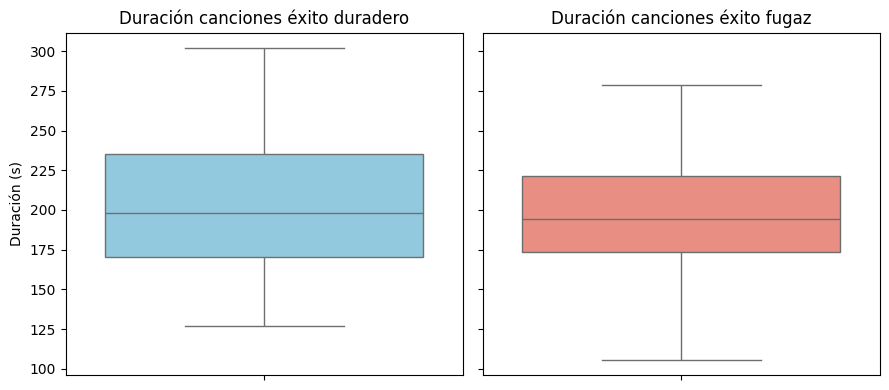

In [139]:
# target vs. duracion en spotify
fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# Boxplot para canciones más populares
sns.boxplot(y=df_eda[df_eda['lrs'] == 'yes']["duration_yt"], ax=ax[0], color="skyblue")
ax[0].set_title("Duración canciones éxito duradero")
ax[0].set_ylabel("Duración (s)")

# Boxplot para canciones menos populares
sns.boxplot(y=df_eda[df_eda['lrs'] == 'no']["duration_yt"], ax=ax[1], color="salmon")
ax[1].set_title("Duración canciones éxito fugaz")
ax[1].set_ylabel("")

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [140]:
from scipy.stats import mannwhitneyu
lrs_yes = df_eda.loc[df_eda.lrs == 'yes', 'duration_yt']
lrs_no = df_eda.loc[df_eda.lrs == 'no', 'duration_yt']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

p_value: 0.6980160739810694


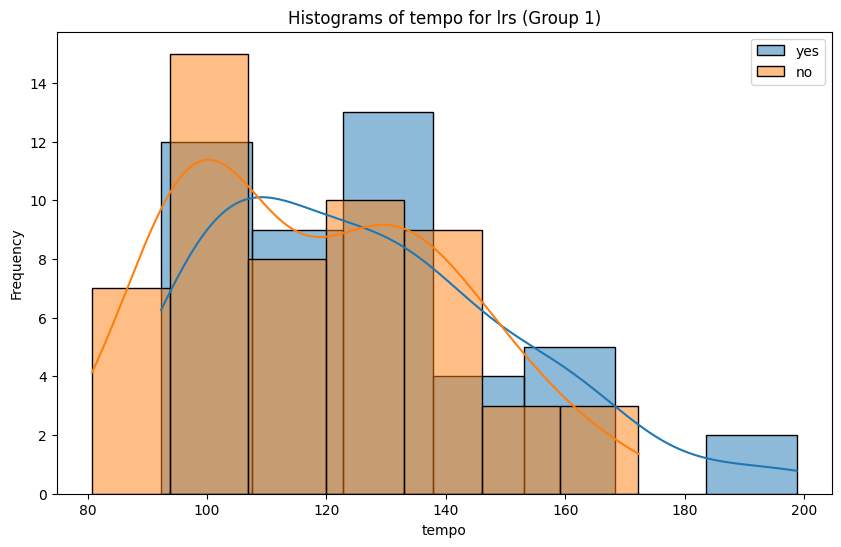

In [141]:
plot_grouped_histograms(df_eda, 'lrs', 'tempo', 2)

In [142]:
from scipy.stats import mannwhitneyu
lrs_yes = df_eda.loc[df_eda.lrs == 'yes', 'tempo']
lrs_no = df_eda.loc[df_eda.lrs == 'no', 'tempo']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

p_value: 0.11440635488863606


In [143]:
df_eda[df_eda.popularity > 90]

,track_name,artist_name,album_name,duration_s,release_date,popularity,explicit,genres,productora,colab,...,tempo,key,avg_rms,avg_flatness,num_onsets,onset_density,format,dif_duration,hybrid_popularity,lrs
30,APT.,"ROSÉ, Bruno Mars",APT.,169.917,2024-10-18,91,False,k-pop,PARIS LG LTD,True,...,152.00,10,0.274064,0.058983,633,3.650868,single,-3.0,86.8,yes
31,Die With A Smile,"Lady Gaga, Bruno Mars",Die With A Smile,251.667,2024-08-16,96,False,"art pop, pop",WARNER MUSIC,True,...,161.50,1,0.161786,0.024294,682,2.703169,single,-1.0,90.6,yes
67,That’s So True,Gracie Abrams,The Secret of Us (Deluxe),166.300,2024-10-18,91,True,NaN,UNIVERSAL,False,...,107.67,8,0.319833,0.024389,493,2.964520,album,-0.0,79.4,yes
68,BIRDS OF A FEATHER,Billie Eilish,HIT ME HARD AND SOFT,210.373,2024-05-17,93,False,NaN,UNIVERSAL,False,...,103.36,2,0.240793,0.096616,835,3.617933,album,-20.0,80.8,yes


##### (1): Encontramos el primer indicio de diferencia significativa (significancia del 94%): las que perduran más tiempo son algo más movidas, tienen en media un tempo más rápido
Sin embargo, también parece que lo que más determina que la canción se pegue por más largo tiempo es que seas un artista consagrado, entonces sí tenemos que estudiar la relacion entre la popularidad largo plazo y el artista que seas y las métricas de seguidores y popularidad que tengas

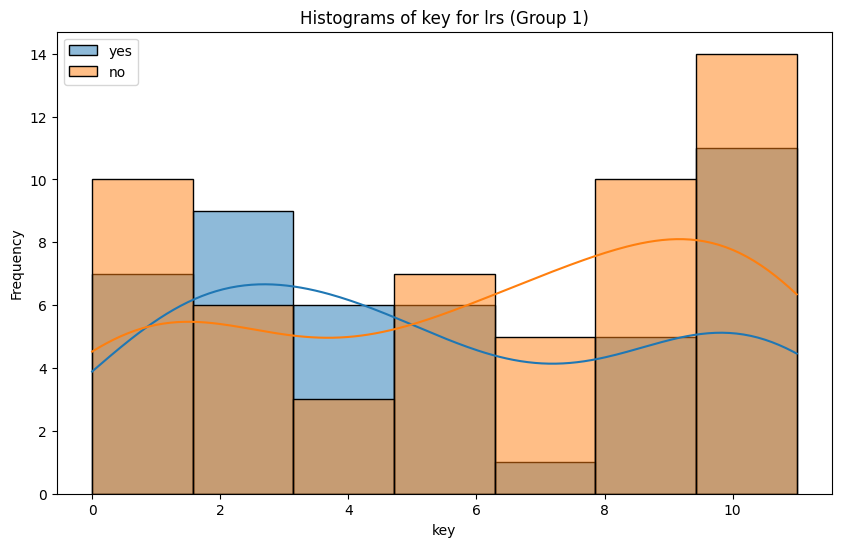

In [145]:
plot_grouped_histograms(df_eda, 'lrs', 'key', 2)

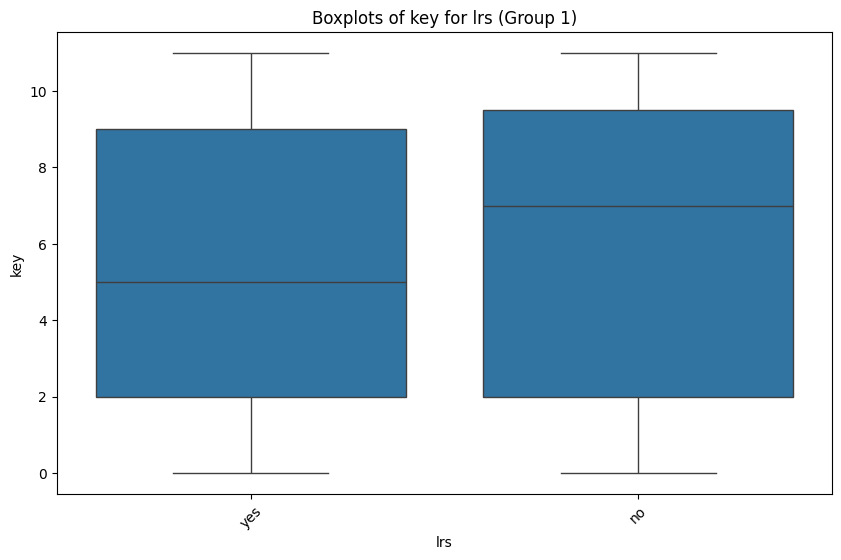

In [146]:
plot_grouped_boxplots(df_eda, 'lrs', 'key')

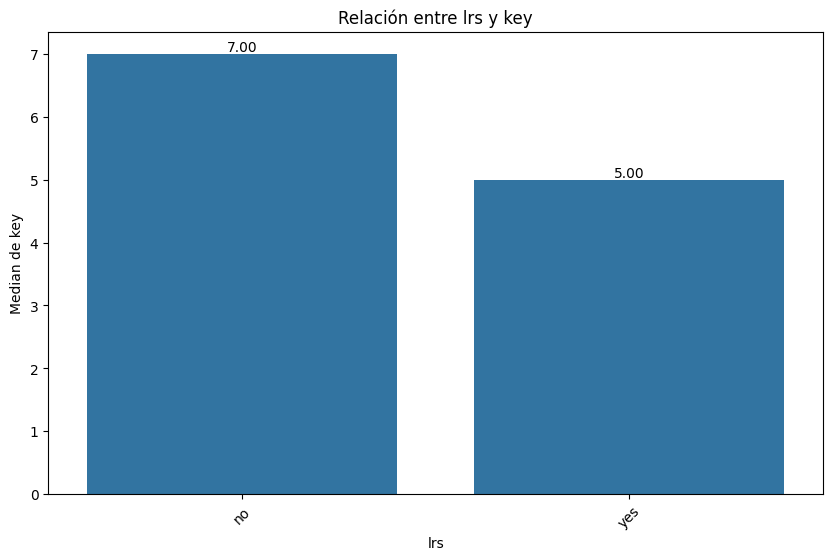

In [147]:
plot_categorical_numerical_relationship(df_eda, 'lrs', 'key', True, 'median')

In [148]:
from scipy.stats import mannwhitneyu
lrs_yes = df_eda.loc[df_eda.lrs == 'yes', 'key']
lrs_no = df_eda.loc[df_eda.lrs == 'no', 'key']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

p_value: 0.4885222106495437


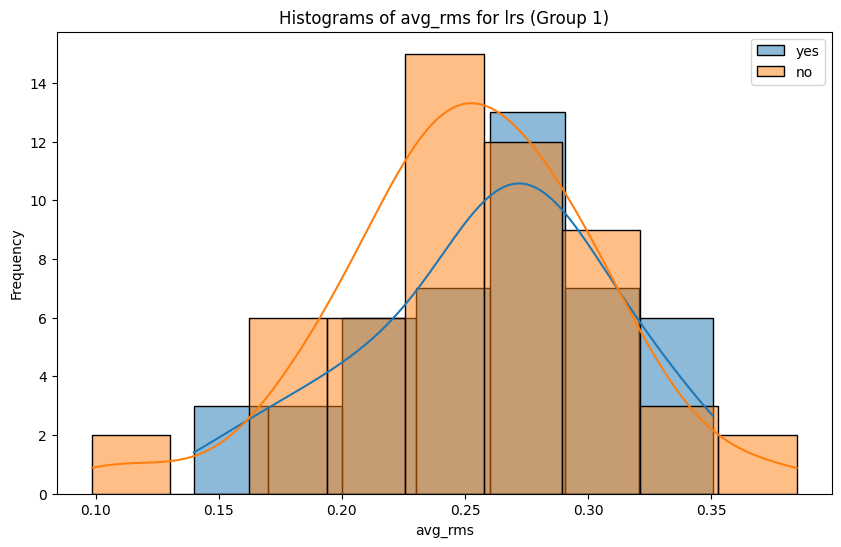

In [149]:
plot_grouped_histograms(df_eda, 'lrs', 'avg_rms', 2)

In [150]:
from scipy.stats import mannwhitneyu
lrs_yes = df_eda.loc[df_eda.lrs == 'yes', 'avg_rms']
lrs_no = df_eda.loc[df_eda.lrs == 'no', 'avg_rms']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

p_value: 0.3425117051494364


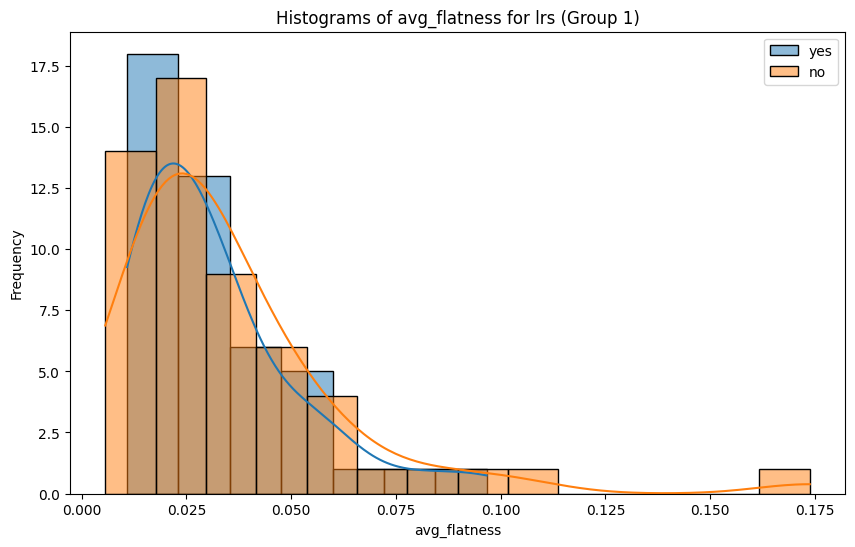

In [151]:
plot_grouped_histograms(df_eda, 'lrs', 'avg_flatness', 2)

In [152]:
from scipy.stats import mannwhitneyu
lrs_yes = df_eda.loc[df_eda.lrs == 'yes', 'avg_flatness']
lrs_no = df_eda.loc[df_eda.lrs == 'no', 'avg_flatness']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

p_value: 0.7238207483340309


In [153]:
# el df final tendrá las siguientes variables
df_eda.columns

Index(['track_name', 'artist_name', 'album_name', 'duration_s', 'release_date',
       'popularity', 'explicit', 'genres', 'productora', 'colab',
       'duration_yt', 'tempo', 'key', 'avg_rms', 'avg_flatness', 'num_onsets',
       'onset_density', 'format', 'dif_duration', 'hybrid_popularity', 'lrs'],
      dtype='object')

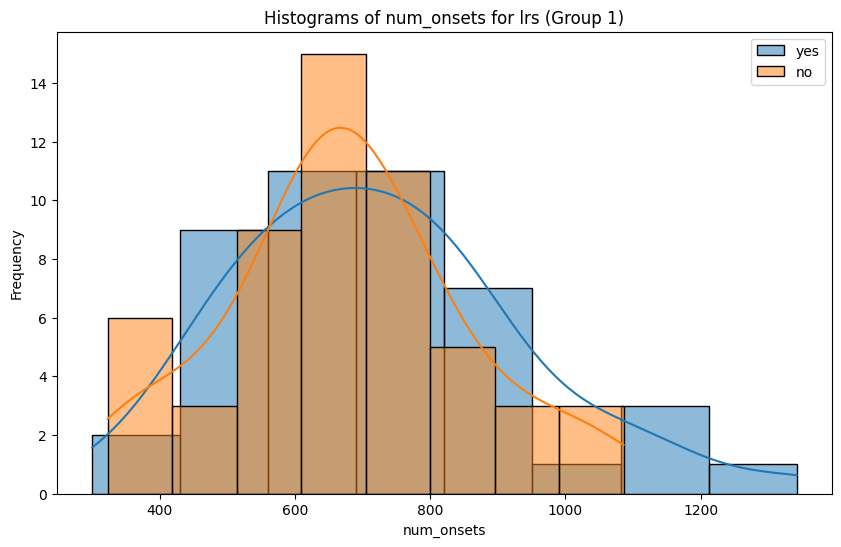

In [154]:
plot_grouped_histograms(df_eda, 'lrs', 'num_onsets', 2)

In [155]:
from scipy.stats import mannwhitneyu
lrs_yes = df_eda.loc[df_eda.lrs == 'yes', 'num_onsets']
lrs_no = df_eda.loc[df_eda.lrs == 'no', 'num_onsets']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

p_value: 0.3826502952305223


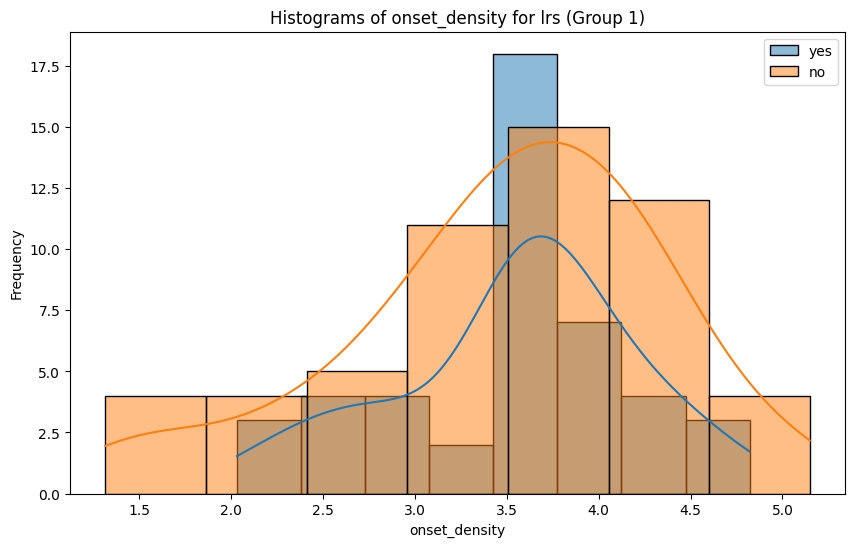

In [156]:
plot_grouped_histograms(df_eda, 'lrs', 'onset_density', 2)

In [157]:
from scipy.stats import mannwhitneyu
lrs_yes = df_eda.loc[df_eda.lrs == 'yes', 'onset_density']
lrs_no = df_eda.loc[df_eda.lrs == 'no', 'onset_density']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

p_value: 0.9172260447548591


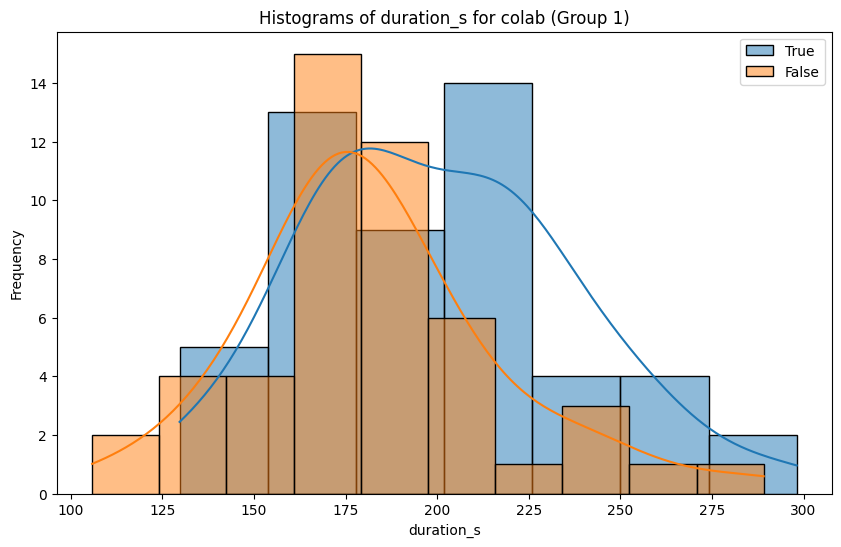

In [158]:
plot_grouped_histograms(df_eda, 'colab', 'duration_s', 2)

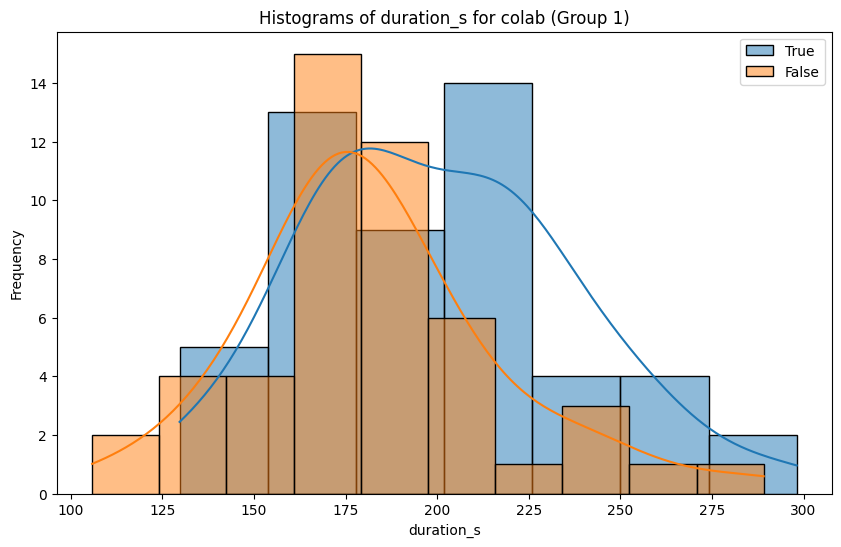

In [159]:
plot_grouped_histograms(df_eda, 'colab', 'duration_s', 2)

#### Categórica vs. Categórica

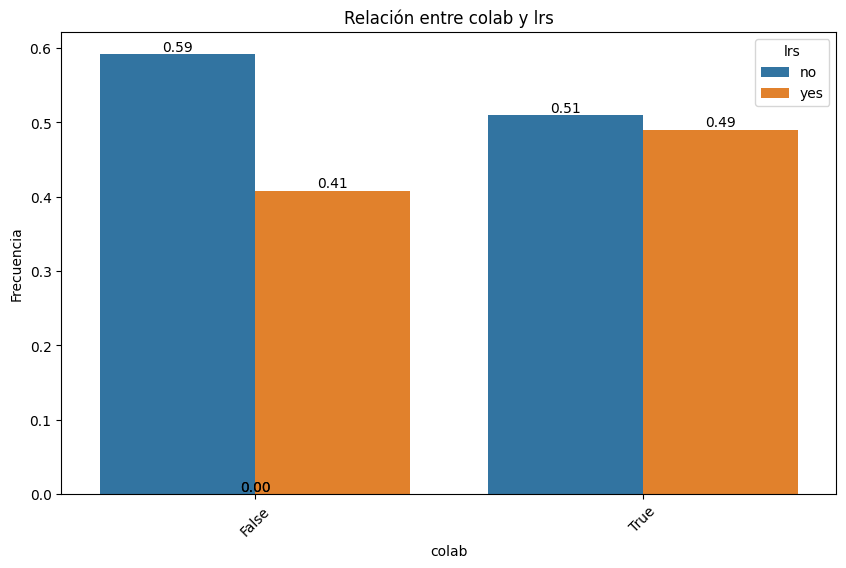

In [160]:
plot_categorical_relationship_fin(df_eda, 'colab', 'lrs', True, True)

In [161]:
from scipy.stats import chi2_contingency
tabla_contingencia = pd.crosstab(df_eda.colab, df_eda.lrs)
chi, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f'Chi: {chi}')
print(f'p: {p}')

Chi: 0.38843820356425435
p: 0.533121492665003


<Figure size 1200x600 with 0 Axes>

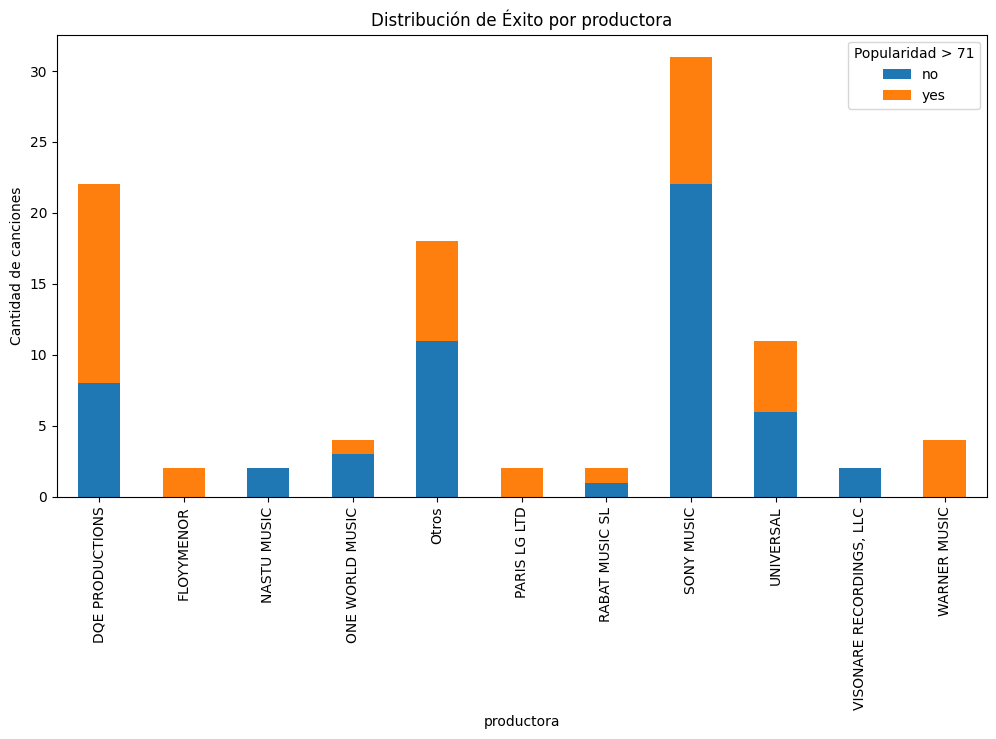

In [162]:
# Suponiendo que df_eda ya tiene la columna 'productora' y 'target'
df_eda['productora_Agrupada'] = df_eda['productora'].copy()

# Agrupar las productoras con solo 1 aparición en "Otros"
productoras_con_1 = df_eda['productora'].value_counts()
otras_productoras = productoras_con_1[productoras_con_1 == 1].index
df_eda.loc[df_eda['productora'].isin(otras_productoras), 'productora_Agrupada'] = "Otros"

# Contar el número de canciones en cada categoría de éxito por productora
conteo = df_eda.groupby(['productora_Agrupada', 'lrs']).size().unstack(fill_value=0)

# Visualización con un gráfico de barras apilado
plt.figure(figsize=(12, 6))
conteo.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("productora")
plt.ylabel("Cantidad de canciones")
plt.title("Distribución de Éxito por productora")
plt.xticks(rotation=90)
plt.legend(title="Popularidad > 71")
plt.show()

In [171]:
conting_prod = df_eda.groupby(['productora', 'lrs']).size().unstack(fill_value=0)
conting_prod['%_success'] = ((conting_prod['yes'] / conting_prod.sum(axis=1))*100).round(2)
conting_prod.sort_values(by='%_success', ascending=False)

lrs,no,yes,%_success
productora,,,
BALLER INC.,0,1,100.00
"LAX MUSIC, LLC / UNIVERSAL",0,1,100.00
RIOT GAMES,0,1,100.00
PARIS LG LTD,0,2,100.00
CIGOL MUSIC GROUP,0,1,100.00
MR. 305 RECORDS,0,1,100.00
LF BABYS,0,1,100.00
WARNER MUSIC,0,4,100.00
CONMUER LLC,0,1,100.00


In [164]:
df_eda[df_eda.productora == 'FLOYYMENOR']

,track_name,artist_name,album_name,duration_s,release_date,popularity,explicit,genres,productora,colab,...,key,avg_rms,avg_flatness,num_onsets,onset_density,format,dif_duration,hybrid_popularity,lrs,productora_Agrupada
51,PELIGROSA,FloyyMenor,PELIGROSA,134.93,2024-07-12,75,True,reggaeton chileno,FLOYYMENOR,False,...,11,0.216879,0.022601,500,3.656822,single,-2.0,69.8,yes,FLOYYMENOR
77,Gata Only,"FloyyMenor, Cris Mj",Gata Only,222.00,2024-02-02,82,True,reggaeton chileno,FLOYYMENOR,True,...,11,0.242084,0.010854,763,3.535958,single,6.0,70.2,yes,FLOYYMENOR


In [165]:
tabla_contingencia = pd.crosstab(df_eda.productora, df_eda.lrs)
chi, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f'Chi: {chi}')
print(f'p: {p}')

Chi: 37.5544299297965
p: 0.08517492493483614


##### (2) Encontramos la segunda significancia, sí impulsa más o menos el sello que te lance

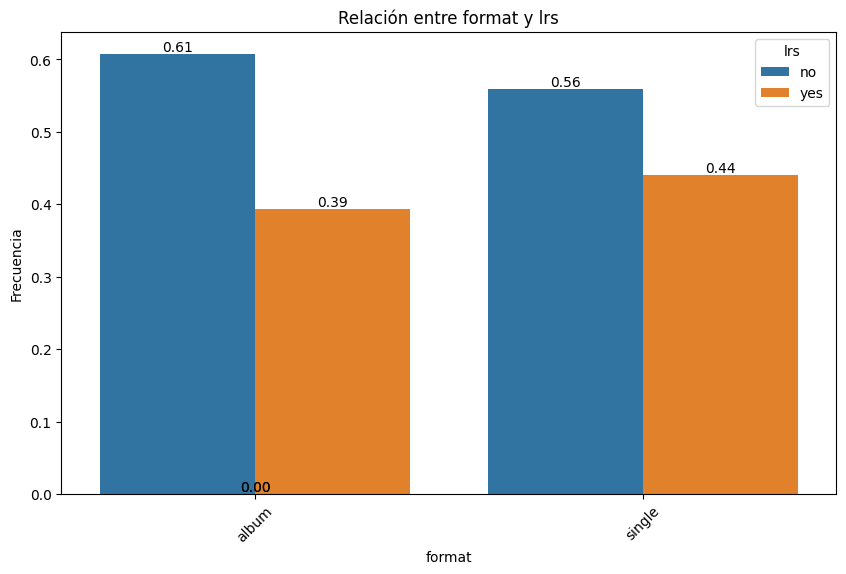

In [166]:
plot_categorical_relationship_fin(df_eda[df_eda.album_name != 'BUENAS NOCHES'], 'format', 'lrs', True, True)

In [167]:
tabla_contingencia = pd.crosstab(df_eda['format'], df_eda.lrs)
chi, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f'Chi: {chi}')
print(f'p: {p}')

Chi: 0.04208754208754209
p: 0.8374529913100172


In [168]:
df_eda.columns

Index(['track_name', 'artist_name', 'album_name', 'duration_s', 'release_date',
       'popularity', 'explicit', 'genres', 'productora', 'colab',
       'duration_yt', 'tempo', 'key', 'avg_rms', 'avg_flatness', 'num_onsets',
       'onset_density', 'format', 'dif_duration', 'hybrid_popularity', 'lrs',
       'productora_Agrupada'],
      dtype='object')

#### Numérica vs. Numérica

In [169]:
df_eda.index.to_series().corr(df_eda["popularity"])

-0.11566105430195658

### 3 o más variables

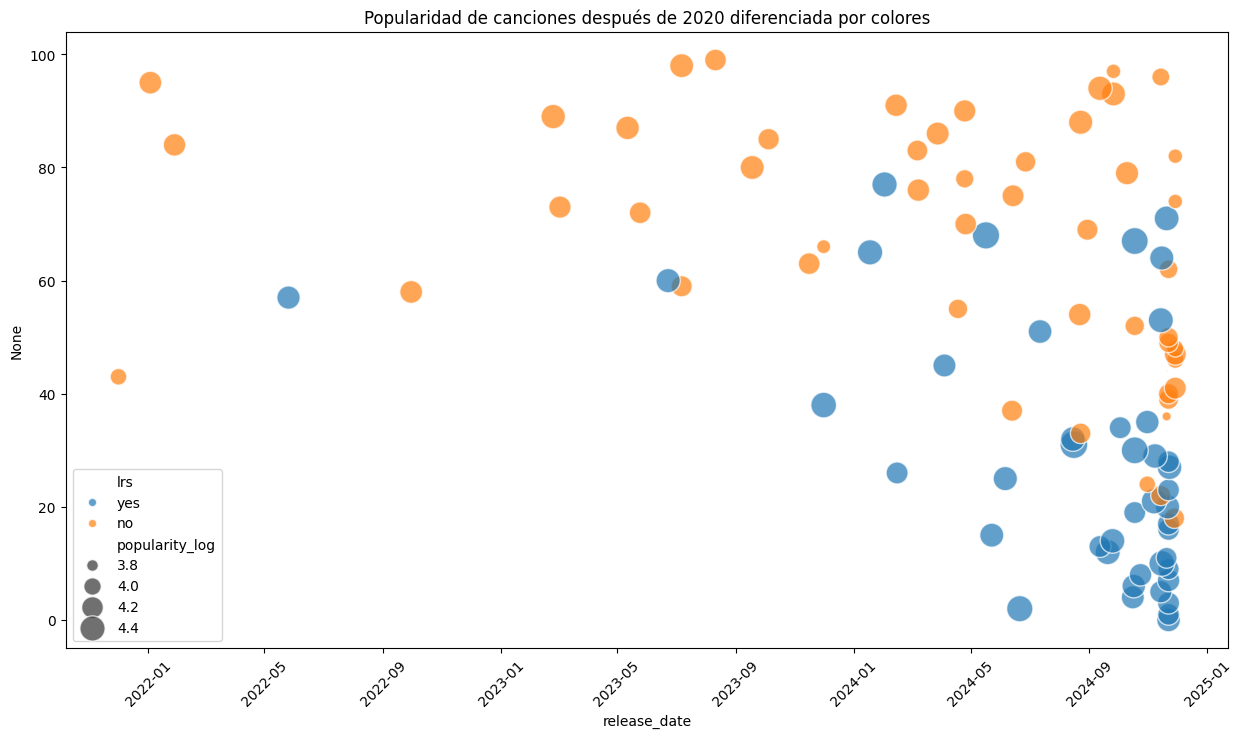

In [170]:
df_actual_filtered = df_eda[df_eda.release_date > '2020'].copy()
df_actual_filtered["popularity_log"] = np.log(df_actual_filtered["popularity"])

# Gráfico con diferenciación por color
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=df_actual_filtered, 
    x="release_date", 
    y=df_actual_filtered.index,
    hue="lrs",  # Diferenciamos por color
    alpha=0.7, 
    size="popularity_log",  # Usamos la transformación logarítmica
    sizes=(1, 400)
)

plt.xticks(rotation=45)
plt.title("Popularidad de canciones después de 2020 diferenciada por colores")
plt.show()